In [4]:
import pandas as pd
import numpy as np

# Display options
pd.set_option("display.max_columns", None)
pd.set_option("display.float_format", lambda x: f"{x:,.4f}")

# Load data
file_path = r"E:\Data Science\India_property_investment_Project\data\raw\india_housing_prices.csv"
df = pd.read_csv(file_path)

df.head()

,ID,State,City,Locality,Property_Type,BHK,Size_in_SqFt,Price_in_Lakhs,Price_per_SqFt,Year_Built,Furnished_Status,Floor_No,Total_Floors,Age_of_Property,Nearby_Schools,Nearby_Hospitals,Public_Transport_Accessibility,Parking_Space,Security,Amenities,Facing,Owner_Type,Availability_Status
0,1,Tamil Nadu,Chennai,Locality_84,Apartment,1,4740,489.7600,0.1000,1990,Furnished,22,1,35,10,3,High,No,No,"Playground, Gym, Garden, Pool, Clubhouse",West,Owner,Ready_to_Move
1,2,Maharashtra,Pune,Locality_490,Independent House,3,2364,195.5200,0.0800,2008,Unfurnished,21,20,17,8,1,Low,No,Yes,"Playground, Clubhouse, Pool, Gym, Garden",North,Builder,Under_Construction
2,3,Punjab,Ludhiana,Locality_167,Apartment,2,3642,183.7900,0.0500,1997,Semi-furnished,19,27,28,9,8,Low,Yes,No,"Clubhouse, Pool, Playground, Gym",South,Broker,Ready_to_Move
3,4,Rajasthan,Jodhpur,Locality_393,Independent House,2,2741,300.2900,0.1100,1991,Furnished,21,26,34,5,7,High,Yes,Yes,"Playground, Clubhouse, Gym, Pool, Garden",North,Builder,Ready_to_Move
4,5,Rajasthan,Jaipur,Locality_466,Villa,4,4823,182.9000,0.0400,2002,Semi-furnished,3,2,23,4,9,Low,No,Yes,"Playground, Garden, Gym, Pool, Clubhouse",East,Builder,Ready_to_Move


In [5]:
print("Shape:", df.shape)

print("\nData types:")
print(df.dtypes)

print("\nMissing values per column:")
print(df.isna().sum())

Shape: (250000, 23)

Data types:
ID                                  int64
State                              object
City                               object
Locality                           object
Property_Type                      object
BHK                                 int64
Size_in_SqFt                        int64
Price_in_Lakhs                    float64
Price_per_SqFt                    float64
Year_Built                          int64
Furnished_Status                   object
Floor_No                            int64
Total_Floors                        int64
Age_of_Property                     int64
Nearby_Schools                      int64
Nearby_Hospitals                    int64
Public_Transport_Accessibility     object
Parking_Space                      object
Security                           object
Amenities                          object
Facing                             object
Owner_Type                         object
Availability_Status                object
d

In [6]:
numeric_cols = df.select_dtypes(include=["int64", "float64"]).columns
df[numeric_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
ID,"250,000.0000","125,000.5000","72,168.9280",1.0000,"62,500.7500","125,000.5000","187,500.2500","250,000.0000"
BHK,"250,000.0000",2.9994,1.4155,1.0000,2.0000,3.0000,4.0000,5.0000
Size_in_SqFt,"250,000.0000","2,749.8132","1,300.6070",500.0000,"1,623.0000","2,747.0000","3,874.0000","5,000.0000"
Price_in_Lakhs,"250,000.0000",254.5869,141.3499,10.0000,132.5500,253.8700,376.8800,500.0000
Price_per_SqFt,"250,000.0000",0.1306,0.1307,0.0000,0.0500,0.0900,0.1600,0.9900
Year_Built,"250,000.0000","2,006.5200",9.8086,"1,990.0000","1,998.0000","2,007.0000","2,015.0000","2,023.0000"
Floor_No,"250,000.0000",14.9668,8.9480,0.0000,7.0000,15.0000,23.0000,30.0000
Total_Floors,"250,000.0000",15.5030,8.6716,1.0000,8.0000,15.0000,23.0000,30.0000
Age_of_Property,"250,000.0000",18.4800,9.8086,2.0000,10.0000,18.0000,27.0000,35.0000
Nearby_Schools,"250,000.0000",5.4999,2.8786,1.0000,3.0000,5.0000,8.0000,10.0000


In [7]:
df["age_calc_2025"] = 2025 - df["Year_Built"]
(df["Age_of_Property"] - df["age_calc_2025"]).describe()

count   250,000.0000
mean          0.0000
std           0.0000
min           0.0000
25%           0.0000
50%           0.0000
75%           0.0000
max           0.0000
dtype: float64

In [8]:
df["calc_price_per_sqft"] = (df["Price_in_Lakhs"] * 100000) / df["Size_in_SqFt"]

df["calc_price_per_sqft"].describe()
corr = df["calc_price_per_sqft"].corr(df["Price_per_SqFt"])
print("\nCorrelation between calc_price_per_sqft and Price_per_SqFt:", corr)


Correlation between calc_price_per_sqft and Price_per_SqFt: 0.9997548463112784


In [9]:
cat_summary = {col: df[col].nunique() for col in df.columns}
cat_summary

{'ID': 250000,
 'State': 20,
 'City': 42,
 'Locality': 500,
 'Property_Type': 3,
 'BHK': 5,
 'Size_in_SqFt': 4501,
 'Price_in_Lakhs': 48700,
 'Price_per_SqFt': 100,
 'Year_Built': 34,
 'Furnished_Status': 3,
 'Floor_No': 31,
 'Total_Floors': 30,
 'Age_of_Property': 34,
 'Nearby_Schools': 10,
 'Nearby_Hospitals': 10,
 'Public_Transport_Accessibility': 3,
 'Parking_Space': 2,
 'Security': 2,
 'Amenities': 325,
 'Facing': 4,
 'Owner_Type': 3,
 'Availability_Status': 2,
 'age_calc_2025': 34,
 'calc_price_per_sqft': 249166}

In [10]:
for col in ["Property_Type", "Public_Transport_Accessibility",
            "Parking_Space", "Security", "Availability_Status"]:
    print(f"\n{col}:")
    print(df[col].value_counts())


Property_Type:
Property_Type
Villa                83744
Independent House    83300
Apartment            82956
Name: count, dtype: int64

Public_Transport_Accessibility:
Public_Transport_Accessibility
High      83705
Low       83287
Medium    83008
Name: count, dtype: int64

Parking_Space:
Parking_Space
No     125456
Yes    124544
Name: count, dtype: int64

Security:
Security
Yes    125233
No     124767
Name: count, dtype: int64

Availability_Status:
Availability_Status
Under_Construction    125035
Ready_to_Move         124965
Name: count, dtype: int64


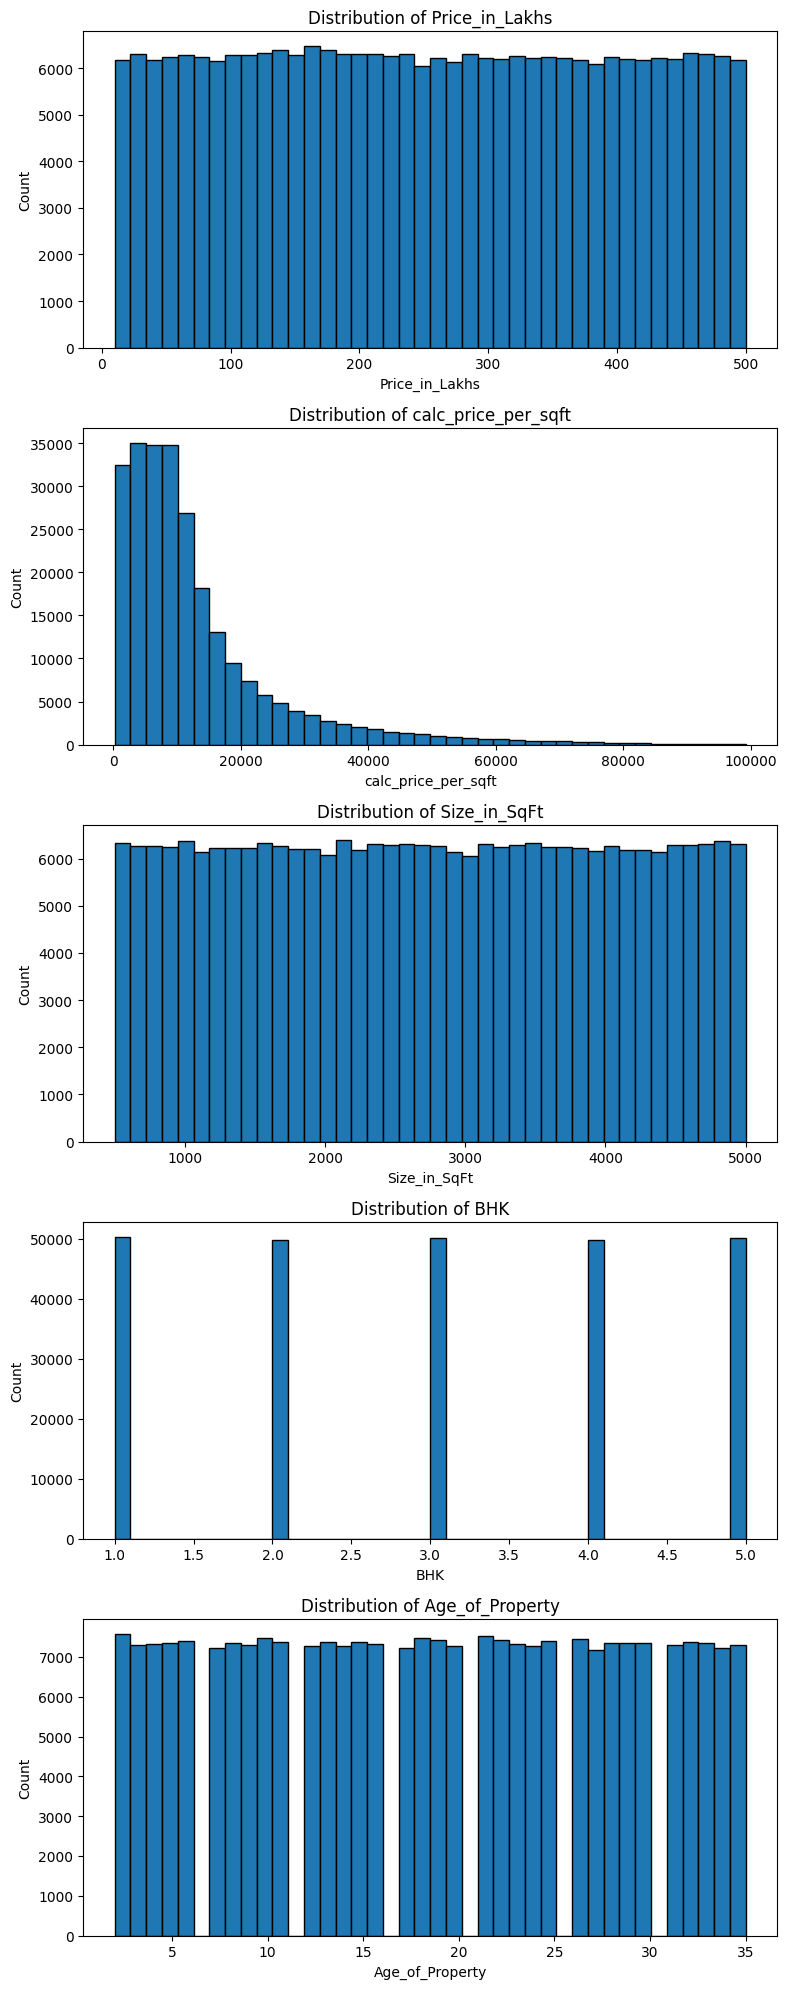

In [ ]:
import matplotlib.pyplot as plt

# Select a few key numeric columns to inspect
num_cols_to_plot = [
    "Price_in_Lakhs",
    "calc_price_per_sqft",   # our real price per sq ft in Rs
    "Size_in_SqFt",
    "BHK",
    "Age_of_Property"
]

# Create histograms for each numeric column
plt.style.use("default")  # reset to basic style

fig, axes = plt.subplots(nrows=len(num_cols_to_plot), ncols=1, figsize=(8, 20))

for ax, col in zip(axes, num_cols_to_plot):
    # Drop any NaNs just in case (even though we know there are none)
    data = df[col].dropna()
    
    # Plot histogram
    ax.hist(data, bins=40, edgecolor="black")
    
    # Title & labels
    ax.set_title(f"Distribution of {col}", fontsize=12)
    ax.set_xlabel(col)
    ax.set_ylabel("Count")

plt.tight_layout()
plt.show()

In [12]:
# List of key categorical columns to inspect
cat_cols_to_check = [
    "State",
    "City",
    "Property_Type",
    "Furnished_Status",
    "Owner_Type",
    "Availability_Status",
    "Parking_Space",
    "Security"
]

for col in cat_cols_to_check:
    print(f"\nColumn: {col}")
    print(df[col].value_counts().head(10))  # top 10 categories
    print("-" * 40)


Column: State
State
Odisha           12681
Tamil Nadu       12629
West Bengal      12622
Gujarat          12578
Delhi            12552
Telangana        12539
Maharashtra      12533
Punjab           12516
Uttar Pradesh    12508
Uttarakhand      12501
Name: count, dtype: int64
----------------------------------------

Column: City
City
Coimbatore     6461
Ahmedabad      6411
Silchar        6404
Durgapur       6387
Cuttack        6358
Vijayawada     6344
Jamshedpur     6335
Bhubaneswar    6323
New Delhi      6306
Kochi          6305
Name: count, dtype: int64
----------------------------------------

Column: Property_Type
Property_Type
Villa                83744
Independent House    83300
Apartment            82956
Name: count, dtype: int64
----------------------------------------

Column: Furnished_Status
Furnished_Status
Unfurnished       83408
Semi-furnished    83374
Furnished         83218
Name: count, dtype: int64
----------------------------------------

Column: Owner_Type
Owner_Typ

In [13]:
# Number of unique categories for each column
cat_unique_counts = df[cat_cols_to_check].nunique().sort_values(ascending=False)
cat_unique_counts

City                   42
State                  20
Property_Type           3
Furnished_Status        3
Owner_Type              3
Availability_Status     2
Parking_Space           2
Security                2
dtype: int64

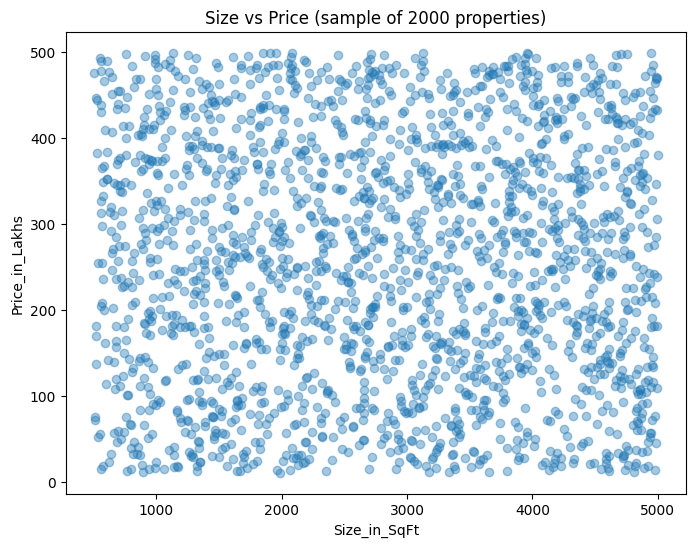

In [14]:
# Quick scatter sample to see relationship between size and price
sample_df = df.sample(2000, random_state=42)  # sample to avoid overplotting

plt.figure(figsize=(8, 6))
plt.scatter(sample_df["Size_in_SqFt"], sample_df["Price_in_Lakhs"], alpha=0.4)
plt.title("Size vs Price (sample of 2000 properties)")
plt.xlabel("Size_in_SqFt")
plt.ylabel("Price_in_Lakhs")
plt.show()

In [15]:
df["Property_Type"].value_counts(normalize=True) * 100


Property_Type
Villa               33.4976
Independent House   33.3200
Apartment           33.1824
Name: proportion, dtype: float64